<div>
<img src="https://res-5.cloudinary.com/crunchbase-production/image/upload/c_lpad,h_256,w_256,f_auto,q_auto:eco/v1455514364/pim02bzqvgz0hibsra41.png" align="right"><br><br><FONT FACE="times new roman" SIZE=5>
<b></b>
<br>
<i><b>Docente:</b></i> Camilo Rodriguez.
<br>
<i><b>Asignatura:</b></i> Semillero de investigación
<br>
<i><b>Estudiante:</b></i> Esteban Rodriguez, Laura Gomez y Santiago Niño
<br>
<i><b>Tema:</b></i> TrabajoSemilleroInvestigacion_Taxis
<br>
<br> Agosto/2023
<br>
</FONT>
</div>

#**Importación de librerias**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import folium
import time
import humanize
from ydata_profiling import ProfileReport
from geopy.geocoders import Nominatim

#**1. Recopilar y preparar los datos**

In [2]:
zip_file_path = "D:\Dataset\SERVICIO_UNIFICADO_2023.parquet"

In [3]:
df = pd.read_parquet(zip_file_path)

In [4]:
df.head(1)

,ID,CITY,USER,LATITUDEORI,LATITUDEDEST,LONGITUDEORI,LONGITUDEDEST,STATUS,CHANNEL,COMPLETEDATE,DATE,DAYOFWEEK,HOUR,MONTH
0,80206465,11001,8168434.0,4.646835,4.669337,-74.101619,-74.111349,CANCELADO,APP,2022-10-01 00:00:00,2022-10-01,6,0,10


#**2. Exploración y limpieza de los datos**

##**Preprocesamiento:**
* Se verifica si se presentan datos no disponibles o NaN para eliminarlos.
* Se eliminan las variables que no se usarán en el desarrollo.
*Se convierte los datos de tipo objeto al tipo de dato que si corresponda.

In [5]:
#Se separa solo los datos de Bogotá
bogota = df[df['CITY'] == 11001]

In [6]:
bogota.shape

(14870616, 14)

In [7]:
print("Número de registro en la ciudad de bogotá: ",bogota.shape[0])

Número de registro en la ciudad de bogotá:  14870616


In [8]:
print("Número de datos NaN por categoria: ", bogota.isnull().sum())

Número de datos NaN por categoria:  ID                     0
CITY                   0
USER                  91
LATITUDEORI            0
LATITUDEDEST     2812968
LONGITUDEORI           0
LONGITUDEDEST    2812968
STATUS                 0
CHANNEL                0
COMPLETEDATE           0
DATE                   0
DAYOFWEEK              0
HOUR                   0
MONTH                  0
dtype: int64


In [9]:
#Se eliminan los datos NaN
df_bogota = bogota.dropna()

In [10]:
print("Número de datos NaN por categoria, después de eliminar las filas que contenian NaN: ", df_bogota.isnull().sum())

Número de datos NaN por categoria, después de eliminar las filas que contenian NaN:  ID               0
CITY             0
USER             0
LATITUDEORI      0
LATITUDEDEST     0
LONGITUDEORI     0
LONGITUDEDEST    0
STATUS           0
CHANNEL          0
COMPLETEDATE     0
DATE             0
DAYOFWEEK        0
HOUR             0
MONTH            0
dtype: int64


In [11]:
#Se verifica el número de datos resultantes
df_bogota.shape[0]

12057629

In [12]:
type(df_bogota['DATE'])

pandas.core.series.Series

In [13]:
df_bogota['COMPLETEDATE'] = pd.to_datetime(df_bogota['COMPLETEDATE'])

C:\Users\Laura\AppData\Local\Temp\ipykernel_13712\2592436540.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bogota['COMPLETEDATE'] = pd.to_datetime(df_bogota['COMPLETEDATE'])


#**3. Análisis Estadístico**

In [14]:
df_bogota['COMPLETEDATE'][0]

Timestamp('2022-10-01 00:00:00')

In [15]:
#Columnas a eliminar
valores_a_eliminar = ['ABORDOCONFIRMADO', 'CONFIRMADO', 'FINALIZADO', 'ALFRENTE', 'NUEVO', 'RECHAZADO', 'ASIGNADO']

In [16]:
# Filtrar los registros que no contienen los valores en la columna 'STATUS'
df_bogota = df_bogota[~df_bogota['STATUS'].isin(valores_a_eliminar)]

In [17]:
valores_a_eliminar =['EXTERNO','CALLE','WEB','Reserva','CHAT_BOT_803','CHAT_BOT_689','IONTAXI','Kiosko #1']

In [18]:
# Filtrar los registros que no contienen los valores en la columna 'STATUS'
df_bogota = df_bogota[~df_bogota['CHANNEL'].isin(valores_a_eliminar)]

In [19]:
df_bogota.shape

(12005856, 14)

In [20]:
print(df_bogota.COMPLETEDATE.min())
print(df_bogota.COMPLETEDATE.max())


2022-10-01 00:00:00
2023-04-20 13:25:47


Solo se tiene registro desde el primero de octubre de 2022
hasta el 20 de abril del 2023, es decir que solo se tiene registro de 7 meses

In [21]:
df_bogota['MONTH'].unique()

array([10, 11, 12,  1,  2,  3,  4], dtype=int64)

In [22]:
df_bogota['DAYOFWEEK'].unique()

array([6, 7, 1, 2, 3, 4, 5], dtype=int64)

In [23]:
df_bogota['YEAR']  = df_bogota['COMPLETEDATE'].dt.year

In [24]:
df_bogota['COMPLETEHOUR'] = df_bogota['COMPLETEDATE'].dt.strftime('%H:%M:%S')

In [25]:
df_bogota.groupby(['STATUS','YEAR'])[['COMPLETEDATE']].describe()


COMPLETEDATE                                 \
                       count                           mean   
STATUS     YEAR                                               
ABANDONADO 2022      4744748  2022-11-21 06:23:10.104971264   
           2023      2653892  2023-02-20 10:53:56.086432256   
CANCELADO  2022       737406  2022-11-16 22:41:27.456223744   
           2023       618080  2023-02-24 15:35:07.148538624   
CUMPLIDO   2022      1561670  2022-11-15 09:29:17.243770880   
           2023      1690060  2023-02-24 16:40:00.000154368   

                                                                     \
                                 min                            25%   
STATUS     YEAR                                                       
ABANDONADO 2022  2022-10-01 00:00:00  2022-10-31 11:12:32.750000128   
           2023  2023-01-01 00:00:00            2023-01-27 12:06:49   
CANCELADO  2022  2022-10-01 00:00:00  2022-10-25 23:52:55.249999872   
           2023  2023-01-01 00:00:02     2023-01-31 12:05:51.500000   
CUMPLIDO   2022  2022-10-01 00:00:00     2022-10-23 08:33:56.500000   
           2023  2023-01-01 00:00:07            2023-01-31 00:16:59   

                                                                     \
                                 50%                            75%   
STATUS     YEAR                                                       
ABANDONADO 2022  2022-11-26 01:16:55  2022-12-14 03:08:15.249999872   
           2023  2023-02-21 12:56:36            2023-03-12 22:41:22   
CANCELADO  2022  2022-11-18 03:46:24     2022-12-09 12:20:39.500000   
           2023  2023-02-26 00:37:40     2023-03-20 03:32:24.500000   
CUMPLIDO   2022  2022-11-15 22:48:55     2022-12-07 18:21:51.500000   
           2023  2023-02-25 03:28:58     2023-03-21 14:15:05.500000   

                                      
                                 max  
STATUS     YEAR                       
ABANDONADO 2022  2022-12-31 23:59:59  
           2023  2023-04-20 13:25:47  
CANCELADO  2022  2022-12-31 23:59:57  
           2023  2023-04-20 13:25:01  
CUMPLIDO   2022  2022-12-31 23:59:56  
           2023  2023-04-20 13:21:20

In [26]:
df_bogota.groupby(['STATUS','MONTH','YEAR'])[['COMPLETEDATE']].describe()

COMPLETEDATE                                 \
                             count                           mean   
STATUS     MONTH YEAR                                               
ABANDONADO 1     2023       754286  2023-01-16 05:13:38.028220160   
           2     2023       763134  2023-02-12 21:32:27.797082624   
           3     2023       872889  2023-03-13 17:29:35.355523072   
           4     2023       263583  2023-04-13 17:06:06.511394816   
           10    2022      1243165  2022-10-18 17:20:44.615780096   
           11    2022      1440816  2022-11-16 03:33:30.638877440   
           12    2022      2060767  2022-12-15 01:54:23.020004096   
CANCELADO  1     2023       158422  2023-01-17 06:45:55.823496704   
           2     2023       172440  2023-02-14 09:05:58.406042624   
           3     2023       197596  2023-03-15 12:43:58.776280832   
           4     2023        89622  2023-04-11 14:27:40.763238912   
           10    2022       243757  2022-10-17 08:49:35.378434304   
           11    2022       225372  2022-11-16 02:36:39.367809792   
           12    2022       268277  2022-12-15 10:21:01.069350400   
CUMPLIDO   1     2023       439589  2023-01-17 09:29:43.857457664   
           2     2023       481018  2023-02-15 00:03:37.753448448   
           3     2023       516813  2023-03-15 23:31:11.680846080   
           4     2023       252640  2023-04-11 08:02:46.706075392   
           10    2022       541044  2022-10-16 13:20:15.603097088   
           11    2022       509341  2022-11-16 07:24:34.873410304   
           12    2022       511285  2022-12-16 01:29:00.316690432   

                                                                           \
                                       min                            25%   
STATUS     MONTH YEAR                                                       
ABANDONADO 1     2023  2023-01-01 00:00:00     2023-01-10 17:04:30.500000   
           2     2023  2023-02-01 00:00:01  2023-02-03 12:49:54.249999872   
           3     2023  2023-03-01 00:00:02            2023-03-07 22:12:20   
           4     2023  2023-04-01 00:00:00            2023-04-10 11:58:45   
           10    2022  2022-10-01 00:00:00            2022-10-08 22:22:27   
           11    2022  2022-11-01 00:00:00            2022-11-08 11:38:53   
           12    2022  2022-12-01 00:00:00     2022-12-07 04:03:12.500000   
CANCELADO  1     2023  2023-01-01 00:00:02     2023-01-10 22:00:43.500000   
           2     2023  2023-02-01 00:00:03            2023-02-05 17:27:17   
           3     2023  2023-03-01 00:00:02  2023-03-08 00:53:32.750000128   
           4     2023  2023-04-01 00:00:02     2023-04-05 19:37:44.500000   
           10    2022  2022-10-01 00:00:00            2022-10-08 16:19:57   
           11    2022  2022-11-01 00:00:02     2022-11-08 12:59:27.500000   
           12    2022  2022-12-01 00:00:03            2022-12-07 18:22:35   
CUMPLIDO   1     2023  2023-01-01 00:00:07            2023-01-10 18:38:52   
           2     2023  2023-02-01 00:00:03            2023-02-07 11:52:11   
           3     2023  2023-03-01 00:00:01            2023-03-08 05:25:43   
           4     2023  2023-04-01 00:00:00  2023-04-05 16:29:55.750000128   
           10    2022  2022-10-01 00:00:00     2022-10-08 09:47:43.500000   
           11    2022  2022-11-01 00:00:12            2022-11-08 21:50:05   
           12    2022  2022-12-01 00:00:01            2022-12-08 04:07:01   

                                                   \
                                              50%   
STATUS     MONTH YEAR                               
ABANDONADO 1     2023         2023-01-17 14:57:06   
           2     2023         2023-02-10 11:47:59   
           3     2023         2023-03-11 17:12:52   
           4     2023         2023-04-16 01:23:31   
           10    2022         2022-10-20 10:22:44   
           11    2022         2022-11-16 17:06:10   
           12    2022         2022-12-1

ABANDONADO:  El mes que tuvo mayor cantidad de abandonos fue el mes  12(Diciembre) 2022 == 2.1 millones
ABANDONADO:  El mes que tuvo menor cantidad de abandonos fue el mes  4(abril) 2023 == 263.6 mil

CANCELADO:  El mes que tuvo mayor cantidad de cancelaciones fue el mes 12(Diciembre) 2022 == 268.3 mil
CANCELADO:  El mes que tuvo menor cantidad de cancelaciones fue el mes 4(abril) 2023 == 89.6 mil

CUMPLIDO:  El mes que tuvo mayor cantidad de viajes completados fue el mes 10(Octubre) 2022 == 541 mil
CUMPLIDO:  El mes que tuvo menor cantidad de viajes completados fue el mes 4(abril) 2023 == 252.6 mil

In [27]:
df_bogota.groupby(['CHANNEL','YEAR'])[['COMPLETEDATE']].describe()

COMPLETEDATE                                 \
                         count                           mean   
CHANNEL      YEAR                                               
APP          2022      6736874  2022-11-19 18:14:29.537518336   
             2023      4618289  2023-02-22 03:58:55.974063872   
CHAT_BOT_659 2022        86051  2022-11-15 22:33:29.509930240   
             2023       104154  2023-02-25 10:56:19.226904320   
IVR          2022       177547  2022-11-13 19:25:41.190946560   
             2023       194031  2023-02-26 08:21:49.305317632   
RECEPCION    2022        43352  2022-11-11 10:29:01.505766656   
             2023        45558  2023-02-24 14:33:17.606852864   

                                                                       \
                                   min                            25%   
CHANNEL      YEAR                                                       
APP          2022  2022-10-01 00:00:00            2022-10-29 01:11:41   
             2023  2023-01-01 00:00:00            2023-01-29 00:11:50   
CHAT_BOT_659 2022  2022-10-01 00:00:08            2022-10-24 21:40:20   
             2023  2023-01-01 00:01:26  2023-01-31 13:02:57.750000128   
IVR          2022  2022-10-01 00:11:07            2022-10-21 14:08:52   
             2023  2023-01-01 00:01:24     2023-01-31 13:28:48.500000   
RECEPCION    2022  2022-10-01 00:01:59  2022-10-19 19:47:16.750000128   
             2023  2023-01-01 00:28:45     2023-01-28 05:19:26.500000   

                                                                              \
                                          50%                            75%   
CHANNEL      YEAR                                                              
APP          2022  2022-11-23 14:58:41.500000            2022-12-12 13:25:54   
             2023         2023-02-23 11:03:02            2023-03-15 20:33:24   
CHAT_BOT_659 2022         2022-11-16 20:36:03            2022-12-07 18:55:51   
             2023         2023-02-26 01:28:52  2023-03-22 20:04:39.249999872   
IVR          2022         2022-11-13 12:55:02     2022-12-05 14:32:35.500000   
             2023         2023-02-27 16:14:24     2023-03-24 12:13:44.500000   
RECEPCION    2022         2022-11-09 20:13:33  2022-12-02 12:39:21.750000128   
             2023  2023-02-24 17:59:11.500000            2023-03-22 20:20:26   

                                        
                                   max  
CHANNEL      YEAR                       
APP          2022  2022-12-31 23:59:59  
             2023  2023-04-20 13:25:47  
CHAT_BOT_659 2022  2022-12-31 23:58:01  
             2023  2023-04-20 13:15:23  
IVR          2022  2022-12-31 23:57:03  
             2023  2023-04-20 13:12:30  
RECEPCION    2022  2022-12-31 23:53:20  
             2023  2023-04-20 13:09:31

In [28]:
df_bogota.groupby(['CHANNEL','MONTH','YEAR'])[['COMPLETEDATE']].describe()

COMPLETEDATE                                 \
                               count                           mean   
CHANNEL      MONTH YEAR                                               
APP          1     2023      1263159  2023-01-16 16:16:03.101539840   
             2     2023      1323587  2023-02-13 16:19:48.111108864   
             3     2023      1483226  2023-03-14 13:27:27.152797440   
             4     2023       548317  2023-04-12 12:54:33.973048576   
             10    2022      1917411  2022-10-18 01:55:52.070116096   
             11    2022      2071358  2022-11-16 04:08:17.261335296   
             12    2022      2748105  2022-12-15 06:22:16.065808384   
CHAT_BOT_659 1     2023        26594  2023-01-17 14:45:09.945401088   
             2     2023        29312  2023-02-15 01:39:20.300150016   
             3     2023        31719  2023-03-16 06:53:50.429742336   
             4     2023        16529  2023-04-11 05:31:34.814689280   
             10    2022        28355  2022-10-16 12:57:46.930417920   
             11    2022        29483  2022-11-16 11:08:36.939117568   
             12    2022        28213  2022-12-15 22:40:24.917981184   
IVR          1     2023        49471  2023-01-17 03:14:41.495765248   
             2     2023        52262  2023-02-15 18:04:07.628430080   
             3     2023        58782  2023-03-16 14:17:25.648123648   
             4     2023        33516  2023-04-11 05:23:14.763635200   
             10    2022        64607  2022-10-16 03:41:06.438141440   
             11    2022        60545  2022-11-16 10:00:58.502436096   
             12    2022        52395  2022-12-16 03:08:36.885771776   
RECEPCION    1     2023        13073  2023-01-17 22:58:35.404038912   
             2     2023        11431  2023-02-14 13:18:49.275828992   
             3     2023        13571  2023-03-16 09:02:06.313094144   
             4     2023         7483  2023-04-10 21:08:34.278898944   
             10    2022        17593  2022-10-16 06:12:50.281703168   
             11    2022        14143  2022-11-15 22:48:24.114827264   
             12    2022        11616     2022-12-15 14:08:27.687328   

                                                                             \
                                         min                            25%   
CHANNEL      MONTH YEAR                                                       
APP          1     2023  2023-01-01 00:00:00     2023-01-10 19:02:05.500000   
             2     2023  2023-02-01 00:00:01     2023-02-04 03:06:52.500000   
             3     2023  2023-03-01 00:00:01  2023-03-07 22:50:58.249999872   
             4     2023  2023-04-01 00:00:00            2023-04-06 03:43:01   
             10    2022  2022-10-01 00:00:00     2022-10-08 18:54:06.500000   
             11    2022  2022-11-01 00:00:00            2022-11-08 12:18:34   
             12    2022  2022-12-01 00:00:00            2022-12-07 11:39:36   
CHAT_BOT_659 1     2023  2023-01-01 00:01:26     2023-01-10 22:53:33.500000   
             2     2023  2023-02-01 00:00:03     2023-02-07 12:58:08.500000   
             3     2023  2023-03-01 00:00:22     2023-03-08 12:28:17.500000   
             4     2023  2023-04-01 00:01:19            2023-04-05 13:31:30   
             10    2022  2022-10-01 00:00:08     2022-10-08 00:42:54.500000   
             11    2022  2022-11-01 00:06:11     2022-11-09 03:07:00.500000   
             12    2022  2022-12-01 00:00:14            2022-12-08 04:56:07   
IVR          1     2023  2023-01-01 00:01:24            2023-01-10 10:19:45   
             2     2023  2023-02-01 00:10:22            2023-02-08 13:50:08   
             3     2023  2023-03-01 00:02:02  2023-03-08 15:16:19.750000128   
             4     2023  2023-04-01 00:03:05            2023-04-05 14:41:12   
             10    2022  2022-10-01 00:11:07     2022-10-08 11:19:40.500000   
             11    2022  2022-11-01 00:12:42            2022-11-09 09:10:53   
     

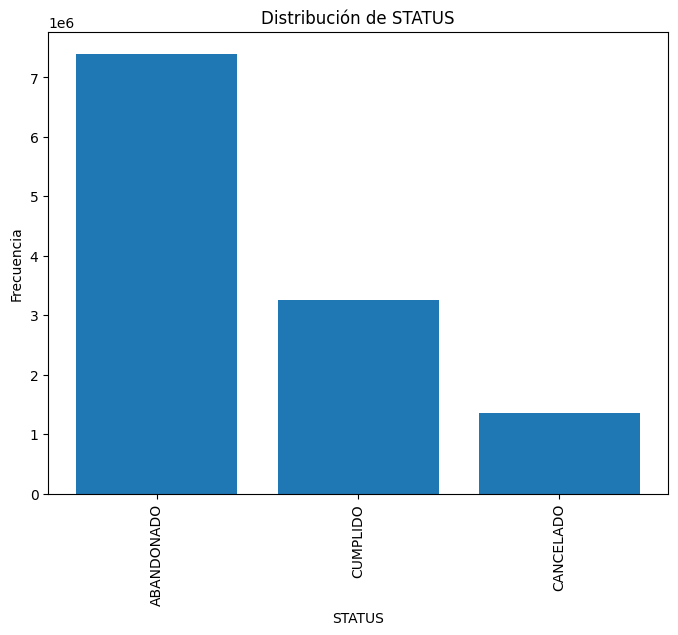

In [29]:
# Obtener la frecuencia de valores para la columna 'STATUS'
status_counts = df_bogota['STATUS'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(status_counts.index, status_counts.values)
plt.title("Distribución de STATUS")
plt.xlabel("STATUS")
plt.ylabel("Frecuencia")
plt.xticks(rotation=90)
plt.show()

#**4. Mapas**

In [30]:
pandas_df = df_bogota[['LATITUDEORI', 'LONGITUDEORI', 'LATITUDEDEST', 'LONGITUDEDEST']]

In [31]:
# Coordenadas de Bogotá como punto de inicio
mapa1 = folium.Map(location=[4.6097, -74.0817], zoom_start=12)

In [32]:
geolocator = Nominatim(user_agent="geoapiExercises")

In [33]:
# Agregar marcadores al mapa para las coordenadas de origen
#for index, row in pandas_df.iterrows():
 #   latitud_ori = row['LATITUDEORI']
 #   longitud_ori = row['LONGITUDEORI']
 #   folium.Marker([latitud_ori, longitud_ori], icon=folium.Icon(color='blue')).add_to(mapa1)
 #   display(mapa1)
 #   time.sleep(5)

#mapa1.save('mapa.html')


In [34]:
#mapa2 = folium.Map(location=[4.6097, -74.0817], zoom_start=12)

In [35]:
# Agregar marcadores al mapa para las coordenadas de destino
#for index, row in pandas_df.iterrows():
 #   latitud_dest = row['LATITUDEDEST']
 #   longitud_dest = row['LONGITUDEDEST']
 #   folium.Marker([latitud_dest, longitud_dest], icon=folium.Icon(color='red')).add_to(mapa2)
 #   display(mapa2)
 #   time.sleep(5)
#mapa2.save('mapa_destinos.html')


In [36]:
gdf_localidades = gpd.read_file("D:/taxis/geojson/georeferencia-puntual-por-localidad.geojson")

In [37]:
# GeoDataFrame origen
gdf_ori = gpd.GeoDataFrame(
    df_bogota,
    geometry=gpd.points_from_xy(df_bogota['LONGITUDEORI'], df_bogota['LATITUDEORI']),
    crs="EPSG:4326"
)

In [38]:
#GeoDataFrame destino
gdf_dest = gpd.GeoDataFrame(
    df_bogota,
    geometry=gpd.points_from_xy(df_bogota['LONGITUDEDEST'],df_bogota['LATITUDEDEST']),
    crs="EPSG:4326"
)

In [40]:
# Realiza una consulta espacial para asignar las localidades a cada ubicación de origen y destino
df['localidad_origen'] = gpd.sjoin(gdf_ori, gdf_localidades, how="left", op="within")['nombre_localidad']
df['localidad_destino'] = gpd.sjoin(gdf_dest, gdf_localidades, how="left", op="within")['nombre_localidad']

C:\Users\Laura\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\interactiveshell.py:3466: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


MemoryError: Unable to allocate 458. MiB for an array with shape (5, 12005856) and data type float64